In [1]:
import imutils
import cv2
import matplotlib.pyplot as plt

imgPath = "./sample.jpg"
image = cv2.imread(imgPath)

In [2]:
(h, w, d) = image.shape
#declares tuple variable and set its value as image.shape

print((h, w, d))
#and image.shape returned y, x, and depth(number of channels)

(1080, 1920, 3)


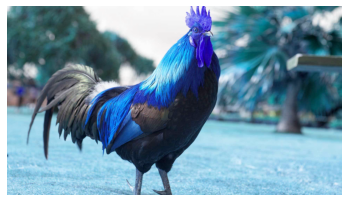

In [3]:
plt.axis("off")
plt.imshow(image)

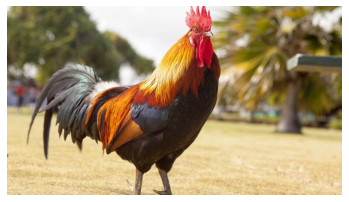

In [4]:
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

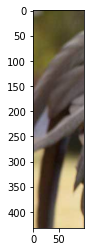

In [5]:
#ROI stands for 'Region of Interest'

roi = image[int((h*.5 - h*.2)):int((h*.5 + h*.2)), 200:300]
#Extracts pixel data of an image.

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

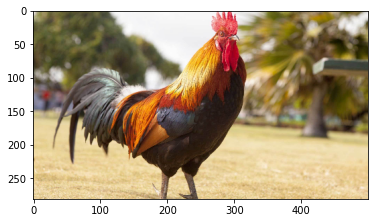

In [6]:
r = 500.0 / w
dim = (500, int(h * r))
resized = cv2.resize(image, dim)

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

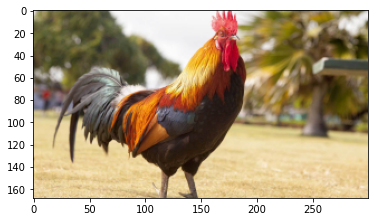

In [7]:
resized = imutils.resize(image, width=300)

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

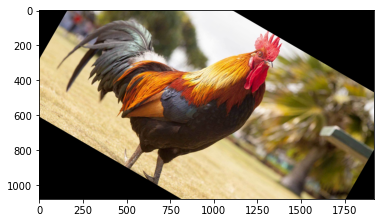

In [8]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -30, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

#or just rotated = imutils.rotate(image, -45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

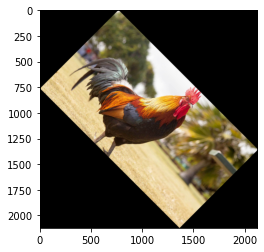

In [9]:
rotated = imutils.rotate_bound(image, 45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

<h1>Counting Objects</h1>

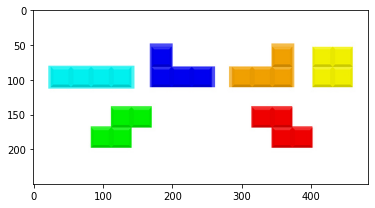

In [81]:
imgPath = "./tetris.png"
image = cv2.imread(imgPath)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

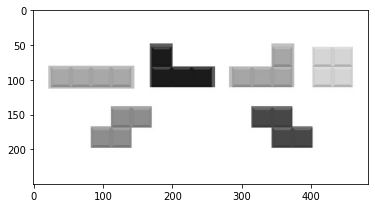

In [11]:
grayed = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(grayed, cv2.COLOR_BGR2RGB))

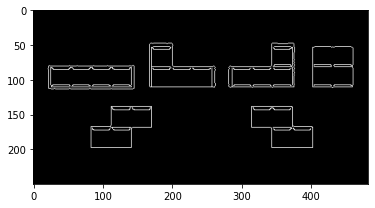

In [12]:
edged = cv2.Canny(grayed, 30, 150)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

#Using Canny algorithm, with threshold of 30 ~ 150, detect edge from the grayed-out image.

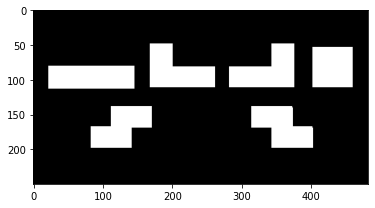

In [19]:
#refrence of Threshold Types used throughout other openCV modules
#https://docs.opencv.org/3.4.0/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a19120b1a11d8067576cc24f4d2f03754
#name thresh implies threshold, here.

thresh = cv2.threshold(grayed, 225, 255, cv2.THRESH_BINARY_INV)[1]
#with cv2.THRESH_BINARY_INV flag, cv2.threshold function does ...
#set value of plxels whose value(brightness) is between 225 and 255 to black(zero brightness)
#and value of pixels whose value is less then 225(minimum threshold) to 255(full brightness)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

In [57]:
[elem[0][1] for elem in c]

[138, 168, 168, 169, 197, 197, 169, 168, 167, 167, 166, 140, 139, 138]

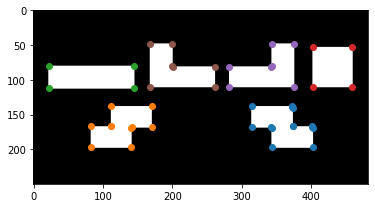

In [62]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
# loop over the contours
for c in cnts:
    x = [elem[0][0] for elem in c]
    y = [elem[0][1] for elem in c]
    plt.scatter(x, y)

<h2>Erosion and Dilation</h2>

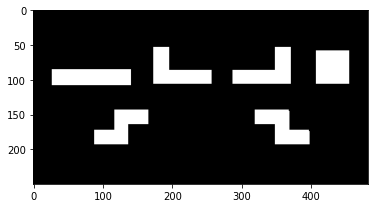

In [77]:
erode = cv2.erode(thresh.copy(), None, iterations=5)
plt.imshow(cv2.cvtColor(erode, cv2.COLOR_BGR2RGB))

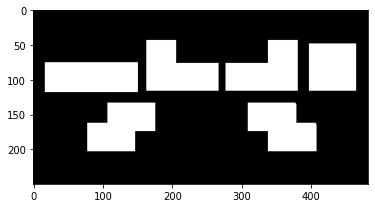

In [78]:
dilate = cv2.dilate(thresh.copy(), None, iterations=5)
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))

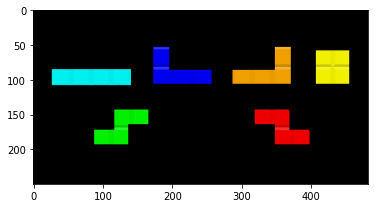

In [84]:
mask = cv2.erode(thresh.copy(), None, iterations=5)
output = cv2.bitwise_and(image, image, mask=mask)
#mask is applied with 'AND operation'

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

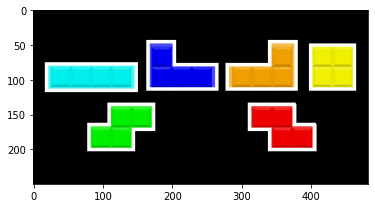

In [85]:
mask = cv2.dilate(thresh.copy(), None, iterations=5)
output = cv2.bitwise_and(image, image, mask=mask)
#mask is applied with 'AND operation'

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))